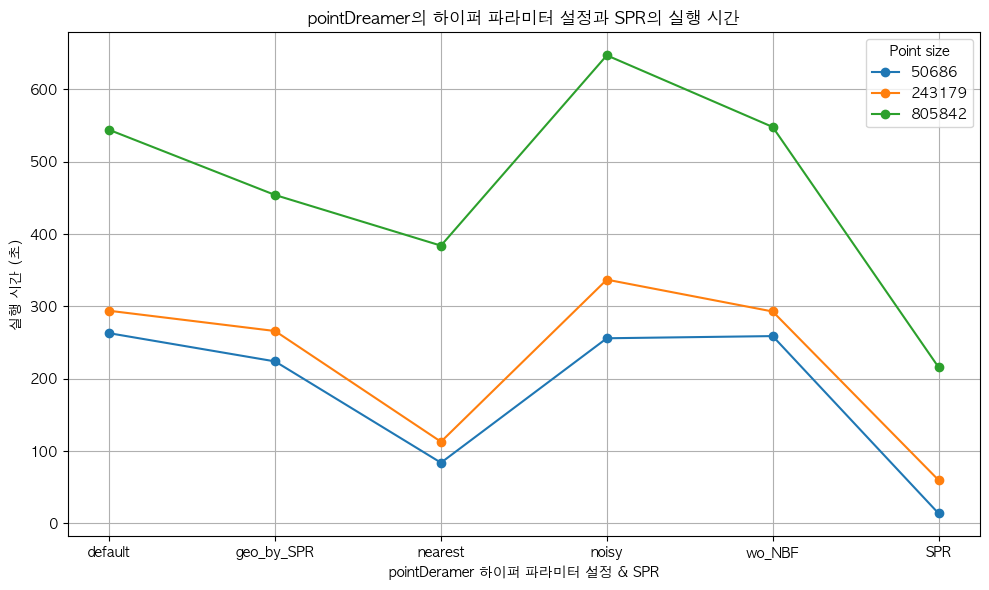

In [3]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 포인트 클라우드 갯수
sizes = [50686, 243179, 805842]
# PointDreamer yaml, SPR
yaml = ['default', 'geo_by_SPR', 'nearest', 'noisy', 'wo_NBF', 'SPR']
# 실행 시간
run = [
    [263, 224, 84, 256, 259, 14],
    [294, 266, 113, 337, 293, 60],
    [544, 454, 384, 647, 548, 216]
]

# 시각화
plt.figure(figsize=(10, 6))

for i, size in enumerate(sizes):
    plt.plot(yaml, run[i], marker='o', label=str(size))  # 숫자만 라벨로 사용

plt.title("pointDreamer의 하이퍼 파라미터 설정과 SPR의 실행 시간")
plt.xlabel("pointDeramer 하이퍼 파라미터 설정 & SPR")
plt.ylabel("실행 시간 (초)")
plt.legend(title="Point size")  # 범례에 제목만 추가 가능
plt.grid(True)
plt.tight_layout()
plt.show()

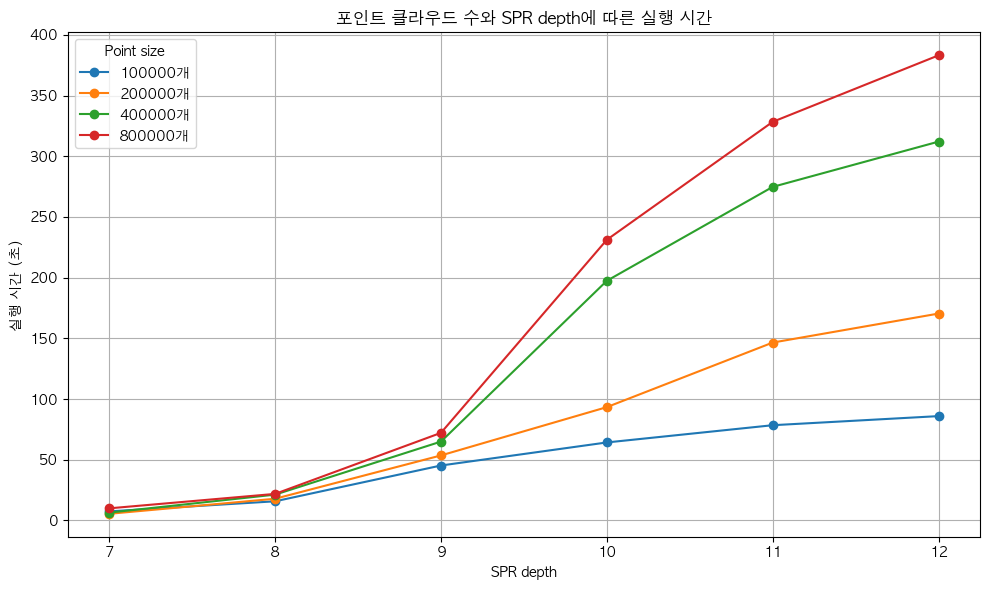

In [2]:
# 포인트 클라우드 갯수
sizes = [100000, 200000, 400000, 800000]
# SPR depth
depth = [7, 8, 9, 10, 11, 12]
# 실행시간
run = [
    [7.4, 15.7, 45.2, 64.2, 78.4, 85.9],
    [5.4, 17.8, 53.5, 93.3, 146.5, 170.4],
    [6.4, 21.2, 64.9, 197.4, 274.8, 312.1],
    [9.9, 21.8, 72.1, 231.2, 328.4, 383.2]
]
# 생성된 포인트 클라우드 갯수
generates = [
    [47390, 173755, 565137, 846182, 962039, 980214],
    [48535, 185101, 627683, 1178293, 1941625, 2118103],
    [49642, 198873, 735623, 2366037, 3484756, 3762990],
    [49332, 199790, 758368, 2503741, 3962849, 4448320]
]

# 시각화
plt.figure(figsize=(10, 6))

for i, size in enumerate(sizes):
    plt.plot(depth, run[i], marker='o', label=str(size)+'개')  # 숫자만 라벨로 사용

plt.title("포인트 클라우드 수와 SPR depth에 따른 실행 시간")
plt.xlabel("SPR depth")
plt.ylabel("실행 시간 (초)")
plt.legend(title="Point size")
plt.grid(True)
plt.tight_layout()
plt.show()

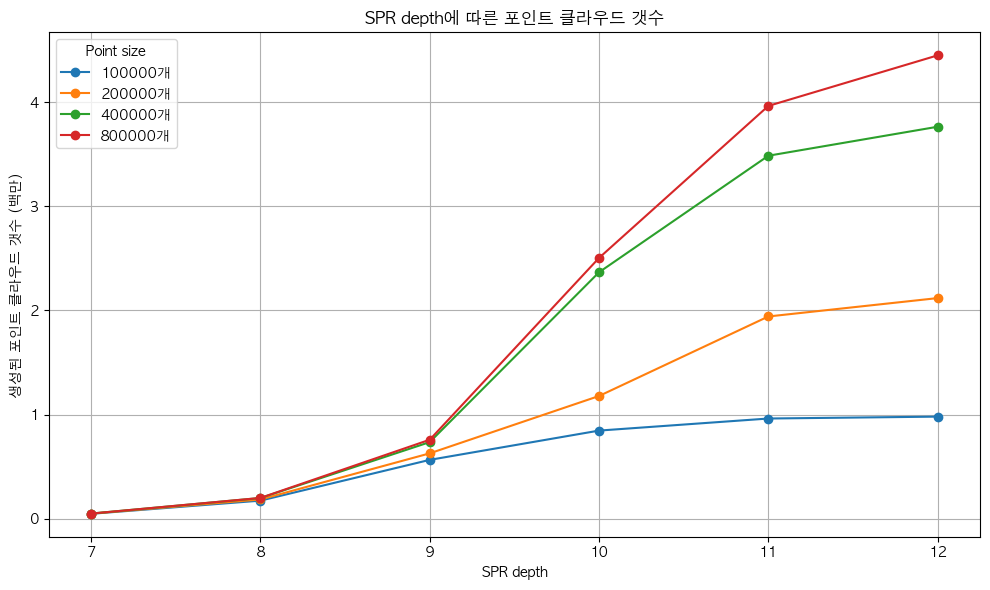

In [3]:
# 시각화
plt.figure(figsize=(10, 6))

for size, generate in zip(sizes, generates):
    plt.plot(depth, [g/1000000 for g in generate], marker='o', label=f"{size}개")

plt.title("SPR depth에 따른 포인트 클라우드 갯수")
plt.xlabel("SPR depth")
plt.ylabel("생성된 포인트 클라우드 갯수 (백만)")
plt.legend(title="Point size")
plt.grid(True)
plt.tight_layout()
plt.show()

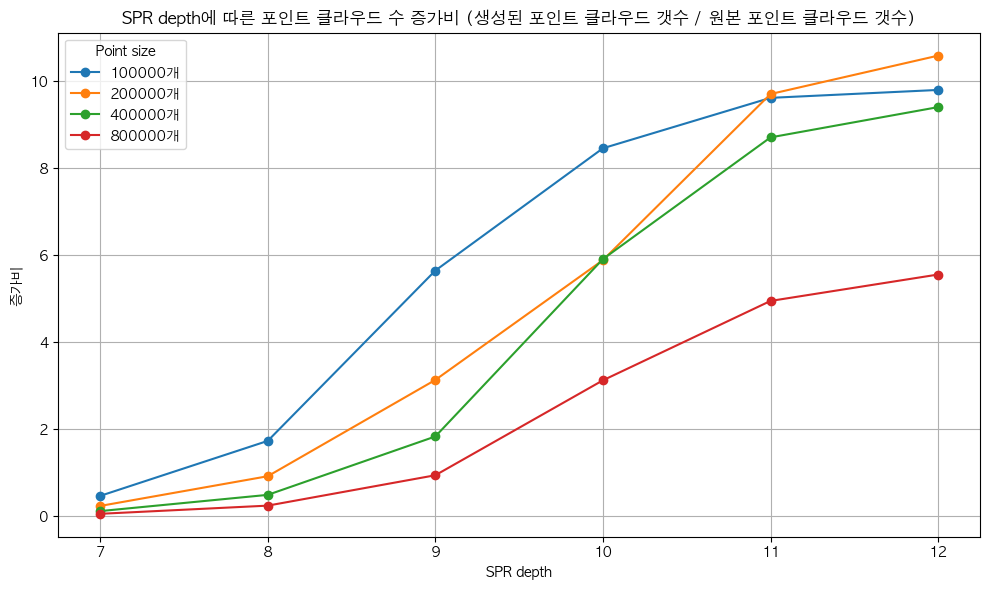

In [4]:
# 시각화
plt.figure(figsize=(10, 6))

for size, generate in zip(sizes, generates):
    ratio = [g / size for g in generate]
    plt.plot(depth, ratio, marker='o', label=f"{size}개")

plt.title("SPR depth에 따른 포인트 클라우드 수 증가비 (생성된 포인트 클라우드 갯수 / 원본 포인트 클라우드 갯수)")
plt.xlabel("SPR depth")
plt.ylabel("증가비")
plt.legend(title="Point size")
plt.grid(True)
plt.tight_layout()
plt.show()

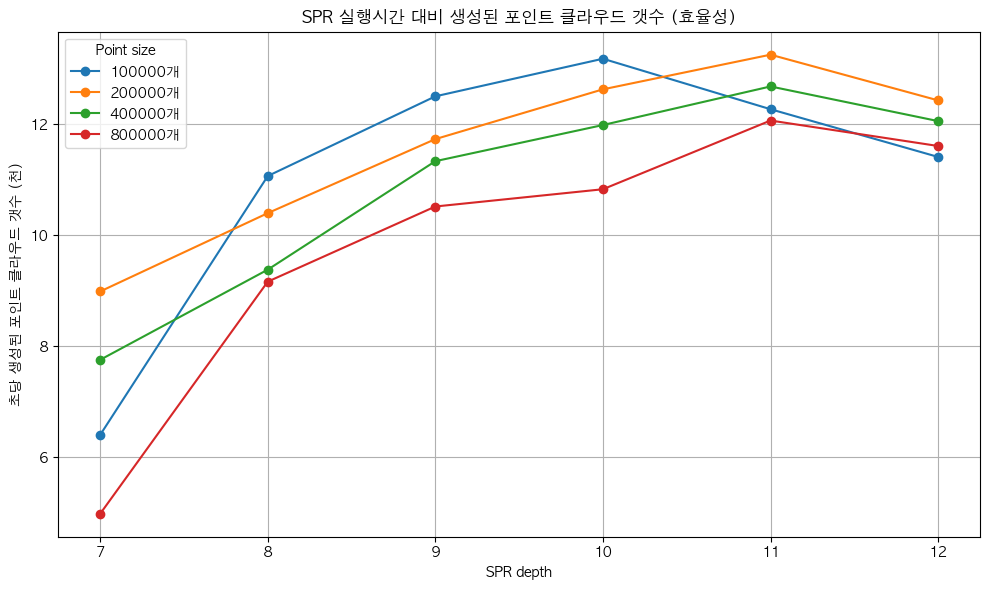

In [5]:
# 효율 계산: generate / run
efficiencies = [
    [g / r for g, r in zip(gen_row, run_row)]
    for gen_row, run_row in zip(generates, run)
]

# 시각화
plt.figure(figsize=(10, 6))

for size, efficiency in zip(sizes, efficiencies):
    plt.plot(depth, [e/1000 for e in efficiency], marker='o', label=f"{size}개")

plt.title("SPR 실행시간 대비 생성된 포인트 클라우드 갯수 (효율성)")
plt.xlabel("SPR depth")
plt.ylabel("초당 생성된 포인트 클라우드 갯수 (천)")
plt.legend(title="Point size")
plt.grid(True)
plt.tight_layout()
plt.show()

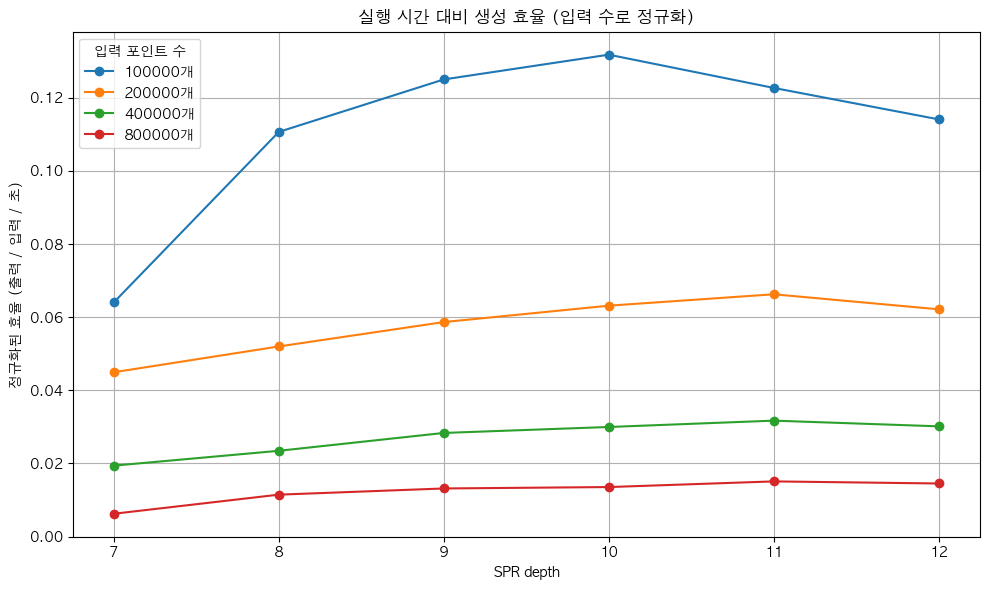

In [6]:
plt.figure(figsize=(10, 6))
for size, g, r in zip(sizes, generates, run):
    efficiency = [gen / (t * size) for gen, t in zip(g, r)]
    plt.plot(depth, efficiency, marker='o', label=f"{size}개")

plt.title("실행 시간 대비 생성 효율 (입력 수로 정규화)")
plt.xlabel("SPR depth")
plt.ylabel("정규화된 효율 (출력 / 입력 / 초)")
plt.legend(title="입력 포인트 수")
plt.grid(True)
plt.tight_layout()
plt.show()

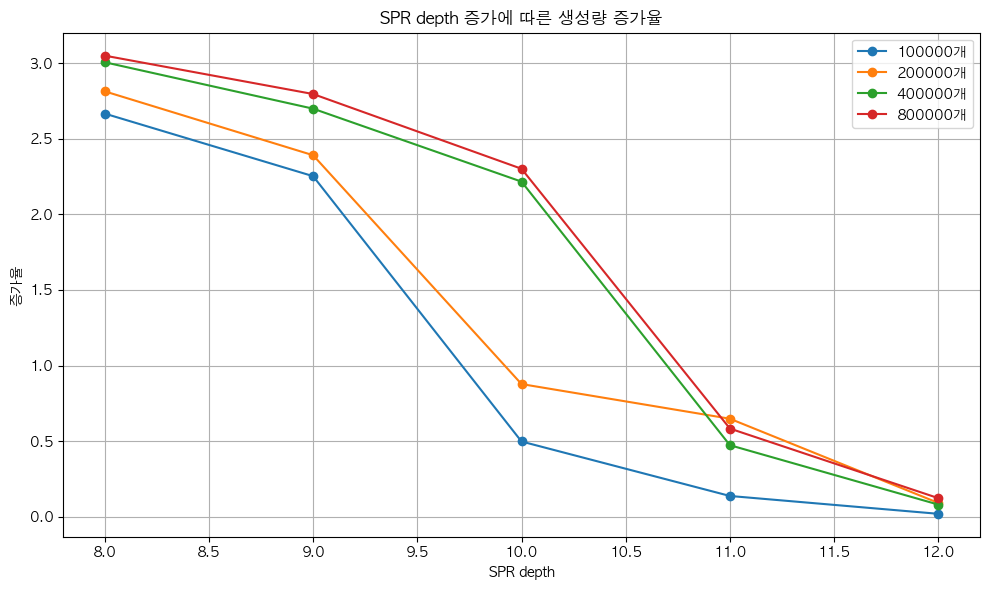

In [4]:
import numpy as np
import matplotlib.pyplot as plt

depth = np.array([7, 8, 9, 10, 11, 12])
sizes = [100000, 200000, 400000, 800000]
generates = np.array([
    [47390, 173755, 565137, 846182, 962039, 980214],
    [48535, 185101, 627683, 1178293, 1941625, 2118103],
    [49642, 198873, 735623, 2366037, 3484756, 3762990],
    [49332, 199790, 758368, 2503741, 3962849, 4448320]
])

# depth 증가에 따른 증가율
growth_rates = []
for row in generates:
    rate = np.diff(row) / row[:-1]  # 각 depth 증가에 따른 증가율
    growth_rates.append(rate)

plt.figure(figsize=(10,6))
for size, rate in zip(sizes, growth_rates):
    plt.plot(depth[1:], rate, marker='o', label=f'{size}개')
plt.title('SPR depth 증가에 따른 생성량 증가율')
plt.xlabel('SPR depth')
plt.ylabel('증가율')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()